<a href="https://colab.research.google.com/github/B-Meister/b-meister.github.io/blob/master/Build_Week_1_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Build Week 1 -** Which products own the gaming industry?
1. Download and Unzip Data from Kaggle (link commented in)
2. Total Games Made
3. Genre 
4. Sale of Games per year (by console)



In [0]:
import pandas as pd
import numpy as np 
import matplotlib as plt
# from sklearn.decomposition import PCA 
# from sklearn.cluster import KMeans 
# from sklearn.preprocessing import StandardScaler 
import statistics  
from matplotlib.pyplot import figure

In [0]:
# https://docs.google.com/spreadsheets/d/1-XX4RmFLJyTKdgLBJeO7wolu9Z6VPCtQHmgvjECxo58/edit#gid=0

In [4]:
#MUST - downloaded and unzip files from https://www.kaggle.com/gregorut/videogamesales
base=pd.read_csv('vgsales.csv') 
base

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
base.columns #which columns do we need?

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [0]:
# cant really use PCA on a ranked list

# clean = base[base['Year'].notna()]
# clean = clean.head(100)
# clean

In [0]:
# pca_data = clean.drop(['Name','Platform','Genre','Publisher'], axis=1)
# pca = PCA(0.9)
# post_pca = pca.fit_transform(pca_data)
# post_pca = pd.DataFrame(post_pca)
# post_pca

In [0]:
# plt.scatter(post_pca[0], post_pca[1], c=post_pca.index)
# plt.title("Variation in Game Sales")
# plt.show()

In [9]:
all_games = base.drop(['Rank'], axis=1) #,'NA_Sales','EU_Sales','JP_Sales','Other_Sales' - going to use PCA instead of just removing the columns
all_games #in case we want to graph all the games made - Sold more than 100,000 copies

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [10]:
#choose 500 because there are a lot of games and they start dropping below 3 million total games sold at this point (about 3% of the games)
#choose 100 - Limited number of consoles - stops at PC - easier to graph (less than 1% of the total games) - considers game sales not grossing
top_games = all_games.head(100)  
top_games #actual data to use for best selling games


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


In [11]:
console_revenue = top_games.drop(['Name','Year','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
sorted_rev = console_revenue.sort_values(by='Genre').sort_values(by='Platform')
sorted_rev.tail(20)

,Platform,Genre,Global_Sales
7,Wii,Misc,29.02
68,Wii,Misc,9.52
78,Wii,Misc,8.49
35,X360,Shooter,13.73
15,X360,Misc,21.82
23,X360,Action,16.38
98,X360,Shooter,7.37
65,X360,Shooter,9.76
62,X360,Shooter,9.88
61,X360,Shooter,10.21


In [0]:
# df.loc[(ThingA, 'Column A') & (ThingB, 'Column B')]


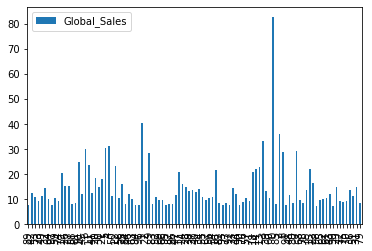

In [13]:
sorted_rev.plot.bar(stacked=True)

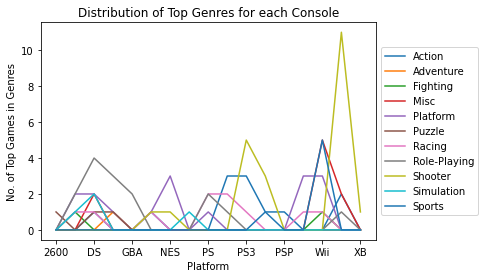

In [14]:
ax = pd.crosstab(sorted_rev['Platform'], sorted_rev['Genre']).plot();
ax.set_title('Distribution of Top Genres for each Console')
ax.set_xlabel('Platform')
ax.set_ylabel('No. of Top Games in Genres')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

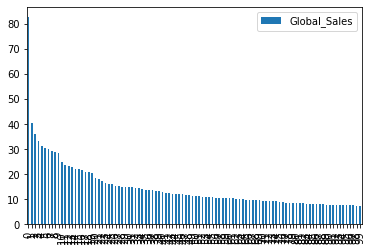

In [15]:
console_revenue.plot.bar(stacked=True);

In [16]:
top_games['Year'].isnull().value_counts()

False    100
Name: Year, dtype: int64

In [17]:
top_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          100 non-null    object 
 1   Platform      100 non-null    object 
 2   Year          100 non-null    float64
 3   Genre         100 non-null    object 
 4   Publisher     100 non-null    object 
 5   NA_Sales      100 non-null    float64
 6   EU_Sales      100 non-null    float64
 7   JP_Sales      100 non-null    float64
 8   Other_Sales   100 non-null    float64
 9   Global_Sales  100 non-null    float64
dtypes: float64(6), object(4)
memory usage: 7.9+ KB


In [18]:
print (all_games['Platform'].value_counts())
print ("")
top_games['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64



X360    16
Wii     15
DS      13
PS3      9
3DS      7
PS2      6
GB       6
PS       5
PS4      5
NES      4
N64      4
SNES     4
GBA      2
PC       1
PSP      1
XB       1
2600     1
Name: Platform, dtype: int64

In [19]:
top_games['Genre'].value_counts()

Shooter         22
Platform        16
Role-Playing    15
Action          12
Racing          10
Misc             9
Sports           6
Simulation       4
Puzzle           3
Fighting         2
Adventure        1
Name: Genre, dtype: int64

In [20]:
all_games.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [21]:
top_games.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

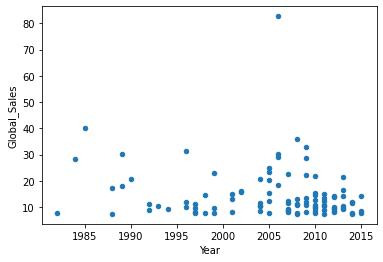

In [23]:
# plt.title('Top 100 video games vs Copies Sold')
top_games.plot.scatter(x='Year', y='Global_Sales');

#graph 3

In [0]:
# The # of games per console 
all_games['Platform'].value_counts().plot(kind='bar');

In [0]:
# Top 500 Games and their console
top_games['Platform'].value_counts().plot(kind='bar');

In [0]:
# No. of games released per console 

# plt.title('Games on Each Console', color='black') - title 
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) - moving the legend

# pd.crosstab(all_games['Year'], all_games['Platform']).plot(c=set3) - trying to change colors

In [0]:
#How many games are produced for each genre - sorted by year
ax = pd.crosstab(all_games['Year'], all_games['Genre']).plot();
ax.set_title('Genre of Games Produced (All Games)');
ax.set_xlabel('Year')
ax.set_ylabel('No. of Games Produced')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

In [0]:
ax = pd.crosstab(top_games['Year'], top_games['Genre']).plot();
ax.set_title('Genre of Games (Top 100 Games Sold)')
ax.set_xlabel('Year')
ax.set_ylabel('No. of Games in Top 100')
# figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k'); #try to make graph bigger
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

In [0]:
# Make a graph that shows total profits for each console - stacked by genre. 

In [0]:
#replace graphs on medium with revised editions 

In [0]:
# top consoles and their games
# haven't used these yet - don't think will be necessary but keeping just in case

all_ps3_games = all_games[all_games.Platform == 'PS3']
all_x360_games = all_games[all_games.Platform == 'X360']
all_ps2_games = all_games[all_games.Platform == 'PS2']
all_wii_games = all_games[all_games.Platform == 'Wii']
all_ps_games = all_games[all_games.Platform == 'PS']
all_ds_games = all_games[all_games.Platform == 'DS']
all_gb_games = all_games[all_games.Platform == 'GB']
all_ps4_games = all_games[all_games.Platform == 'PS4']
all_3ds_games = all_games[all_games.Platform == '3DS']
all_n64_games = all_games[all_games.Platform == 'N64']
all_gba_games = all_games[all_games.Platform == 'GBA']
all_nes_games = all_games[all_games.Platform == 'NES']
all_snes_games = all_games[all_games.Platform == 'SNES']
all_wiiu_games = all_games[all_games.Platform == 'WiiU']
all_pc_games = all_games[all_games.Platform == 'PC']

top_ps3_games = top_games[top_games.Platform == 'PS3']
top_x360_games = top_games[top_games.Platform == 'X360']
top_ps2_games = top_games[top_games.Platform == 'PS2']
top_wii_games = top_games[top_games.Platform == 'Wii']
top_ps_games = top_games[top_games.Platform == 'PS']
top_ds_games = top_games[top_games.Platform == 'DS']
top_gb_games = top_games[top_games.Platform == 'GB']
top_ps4_games = top_games[top_games.Platform == 'PS4']
top_3ds_games = top_games[top_games.Platform == '3DS']
top_n64_games = top_games[top_games.Platform == 'N64']
top_gba_games = top_games[top_games.Platform == 'GBA']
top_nes_games = top_games[top_games.Platform == 'NES']
top_snes_games = top_games[top_games.Platform == 'SNES']
top_wiiu_games = top_games[top_games.Platform == 'WiiU']
top_pc_games = top_games[top_games.Platform == 'PC']
